# SyriaTel Customer Churn Prediction

**Author:** Michael Kamuya Makao   
**Phase:** Phase 3 – Classification Modeling

---

## Objective

To build a classification model to predict whether a customer will soon stop doing business with **SyriaTel**, and then translate the results into actionable business insights for customer retention.


## Introduction 
Customer (Churn) happens when customers stop using a company's services. For a telecommunications company like SyriaTel, churn leads to revenue loss and increased costs because acquring new  customers is more expensive than retaining existing ones.

In this project, I developed a Machine learning classification model That predicts  whether a customer is likely to soon leave **SyriaTel** 

I analyzed the data and created visualisations inorder  to understand why customers are leaving and provided business recommendations aimed at reducing churn and improving customer retention. 

## Business Problem
SyriaTel is experiencing significant customer churn, leading to revenue loss and increased costs associated with acquiring new customers. Retaining existing customers is more cost-effective than acquiring new ones, making churn reduction a critical business priority.

## Business Understanding 
SyriaTel is a telecommunications company that wants to reduce revenue loss caused by customers leaving the service (churn).I aimed to develop a machine learning classifier that can predict whether a customer is likely to live soon 

In [239]:
#import necessary libraries
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [240]:
# Loading the Dataset
df= pd.read_csv('../data/bigml.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [241]:
# Basic Data Overview 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [242]:
df.describe()# Basic statistical summary

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Description

The dataset contains **3,333 customer records** with **21 features**, including customer demographics, service plans, usage patterns, and customer service interactions.

There is a mixture of numeric and categorical features


In [243]:
# Checking the null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no **missing values** in the dataset.

In [244]:
# Checking the distribution of target variable
df['churn'].value_counts(normalize=True)


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


### Churn Distribution
- **85.5%** of customers did **not churn**
- **14.5%** of customers **churned**

This imbalance indicates that accuracy alone may not be sufficient to evaluate model performance, and additional metrics such as precision, recall, and F1-score are necessary so that the model can be accurate iorder to identify as many churners as possible .


## Visualization: Churn Distribution 
Most customers do not churn, indicating class imbalance

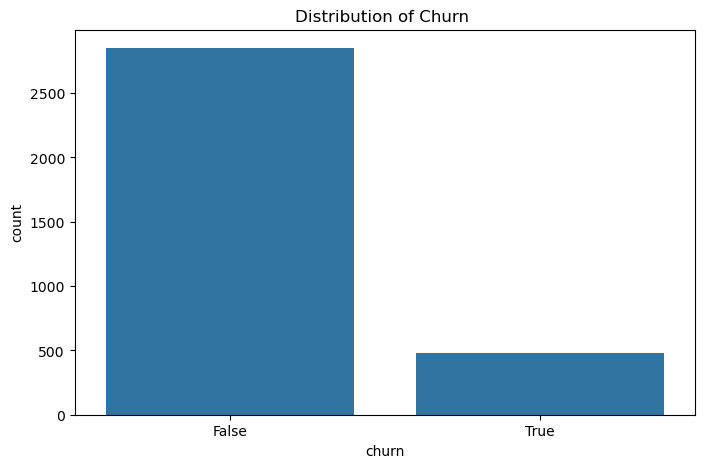

In [245]:
# The plot before balancing the target variable
plt.figure(figsize=(8,5))
sns.countplot(x='churn',data=df)     
plt.title('Distribution of Churn ')
plt.show()

## Exploratory Data Analysis (EDA)

The analysis shows that the dataset is moderately sized and well-balanced in terms of feature availability. However, the target variable is **imbalanced**, with the majority of customers not churning.

We will be checking Customers who tend to make more calls using the Service Calls or The International calls.


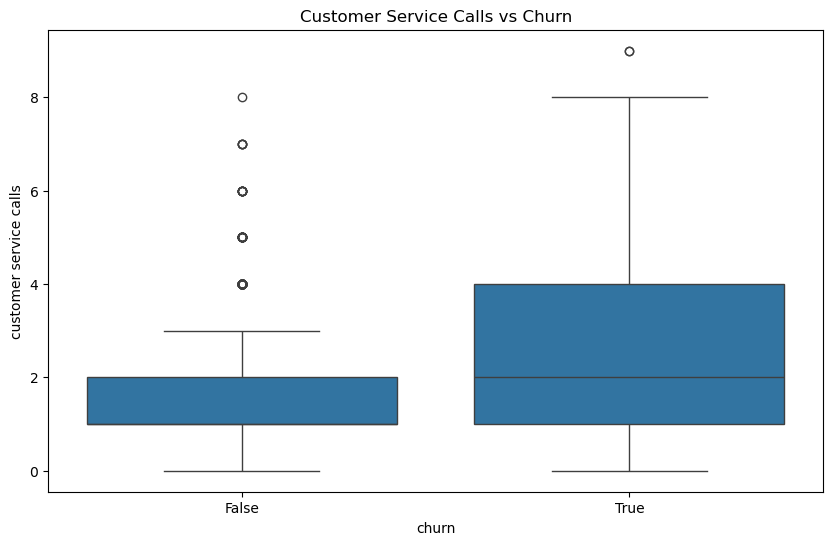

In [246]:
# Customer Service Calls vs Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls vs Churn')
plt.show()

 Customers who churn tend to make more service calls.

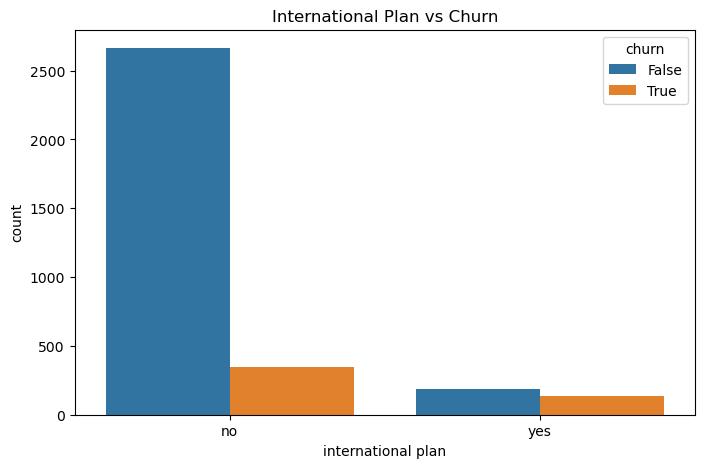

In [247]:
# International Plan vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('International Plan vs Churn')    
plt.show()

Customers with international plans churn more frequently.

# Data preparation
Encoded Categorical Variables



In [248]:
# List of columns with yes/no values
binary_cols = ['international plan', 'voice mail plan']

# Loop through each binary column
for col in binary_cols:
    # Convert values to string, lowercase them, map yes/no to 1/0,
    # and keep missing values as <NA>
    df[col] = (
        df[col]
        .astype(str)
        .str.lower()
        .map({'yes': 1, 'no': 0})
        .astype('Int64')
    )
# Verify the changes
df[binary_cols].head()

,international plan,voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [249]:
df.head()# Checking the columns after encoding

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [250]:
# Dropping unnecessary columns
df = df.drop(columns=['state','phone number'])
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [251]:
# Define feature variables and target variable
X = df.drop('churn', axis=1)
y = df['churn']

## Train-Test Split


In [252]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42, stratify=y
)

# Feature Scaling

In [253]:
# Feature Scaling and transformation 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Model: Logistic Regression
## Model Perfomance 

We evaluate a Logistic Regression model as a baseline classifier on the test set.  
Due to an imbalanced class distribution (approximately 85% `False` and 15% `True`), accuracy alone is not sufficient to assess model performance.


In [254]:
# The baseline model - Logistic Regression
logreg = LogisticRegression(random_state=42) # Initializing the model
logreg.fit(X_train_scaled, y_train)    # Fitting the model
y_pred = logreg.predict(X_test_scaled) # Making predictions
print(classification_report(y_test, y_pred)) # Evaluating the model


              precision    recall  f1-score   support

       False       0.88      0.97      0.92       713
        True       0.54      0.23      0.32       121

    accuracy                           0.86       834
   macro avg       0.71      0.60      0.62       834
weighted avg       0.83      0.86      0.83       834



## Comparison Of the TRUE AND FALSE
## Class: False(majority class)

Precision: 0.88
→ When the model predicts False, it is correct 88% of the time.
Recall: 0.97
→ The model correctly identifies 97% of all actual False cases.
F1-score: 0.92
→ Strong overall performance for this class.

'The model Is Verygood at predicting the majority class'
 
 ## Class: True(minority class)

Precision: 0.54
→ Only 54% of predicted True labels are correct.
Recall: 0.23
→ The model finds only 23% of all actual True cases.
F1-score: 0.32
→ Poor performance for this class.
'Due to the imbalance data the model missesto detect the (True) Positive statements.'

Accuracy: 0.86
→ Looks high, but is misleading due to class imbalance.
Macro average F1: 0.62
→ Treats both classes equally → reveals weak minority-class performance.
Weighted average F1: 0.83
→ Dominated by the majority class → inflates perceived performance.

This imbalance causes the model to miss many important positive cases, making it unsuitable for tasks where detecting True outcomes is critical unless further improvements (e.g., resampling, class weighting, or threshold tuning) are applied.

### Ensemble Model: Random 

## Random Forest Classifier – Model Evaluation
The Random Forest Classifier was trained using 200 decision trees with a maximum depth of 10.  
Its performance was evaluated using a classification report on the test dataset.


In [255]:
# Random Forest Classifier
# Initializing the model 
rf_model = RandomForestClassifier(
n_estimators=200,   # number of decision trees
max_depth=10,       # maximum depth of each tree 
random_state=42     # for reproducibility
)

rf_model.fit(X_train, y_train) # Fitting the model

y_pred_rf = rf_model.predict(X_test) # Making predictions

print(classification_report(y_test, y_pred_rf)) # Evaluating the model

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       713
        True       0.93      0.70      0.80       121

    accuracy                           0.95       834
   macro avg       0.94      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



The model does well in identifying the False Churn correctly but we need the True to balance and the accuracy hides missed churners in the imbalanced data 

The model need to identify more churners since they are important in the test so we will increase the number of misclassifying churners which will force the model to check the True positive (minority class) .

In [256]:
# modified random forest model
# initializing the model with class_weight to handle class imbalance
rf_model = RandomForestClassifier(
    n_estimators=200,# number of decision trees
    max_depth=10,# maximum depth of each tree
    class_weight='balanced',# to handle class imbalance
    random_state=42 
)

# Fitting the model
rf_model.fit(X_train, y_train) # Fitting the model
# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]
#Lower decision threshold
y_pred_adjusted = (y_probs >= 0.35).astype(int)
# Evaluating the model
print(classification_report(y_test, y_pred_rf)) # Evaluating the model

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       713
        True       0.93      0.70      0.80       121

    accuracy                           0.95       834
   macro avg       0.94      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



In [257]:

# logistic regression with class weights
log_model = LogisticRegression(
    class_weight={0:1, 1:3},
    max_iter=1000
)

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

       False       0.91      0.88      0.89       713
        True       0.41      0.51      0.46       121

    accuracy                           0.82       834
   macro avg       0.66      0.69      0.67       834
weighted avg       0.84      0.82      0.83       834



c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comparison btween the  Logistic regression and Random Forest Classifier
A Logistic Regression model was evaluated as an alternative to the Random Forest classifier to improve churn detection. While the Logistic Regression model increased the number of customers flagged as potential churners, it achieved a churn recall of only **51%**, significantly lower than the **70%** achieved by the Random Forest model.
Additionally, the Logistic Regression model generated a high number of false positives, resulting in reduced precision and overall accuracy. Although the model converged with additional iterations and feature scaling, it did not outperform the Random Forest model in identifying at-risk customers.

**Compared to Logistic Regression, the Random Forest model achieved higher recall for churners, meaning it identified more customers likely to leave. Because SyriaTel values retaining customers over minimizing false alarms, the Random Forest model was selected as the final model.**



The final model was evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.

Since the main business goal is to **identify customers who are likely to churn**, recall for the churn class (True Positives) is the most important metric. Missing a churner means losing revenue, while falsely flagging a loyal customer only results in a small retention cost.

Therefore, the model selection prioritizes **high recall for churners**, while maintaining reasonable overall performance.

In [258]:
## Classification Report 
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

       False       0.91      0.88      0.89       713
        True       0.41      0.51      0.46       121

    accuracy                           0.82       834
   macro avg       0.66      0.69      0.67       834
weighted avg       0.84      0.82      0.83       834




The classification report shows that the model performs well in identifying non-churning customers, with high precision and recall.

For churn prediction (True class), the model achieves:
- **Recall of 0.51**, meaning it correctly identifies about half of customers who are likely to churn.
- **Precision of 0.41**, indicating that some customers predicted to churn may actually stay.

From a business perspective, recall is the most important metric because failing to identify a churner results in direct revenue loss. While some non-churners may receive retention offers, this cost is lower than losing customers.

Overall, the model provides meaningful predictive power and aligns well with SyriaTel’s churn reduction goals.

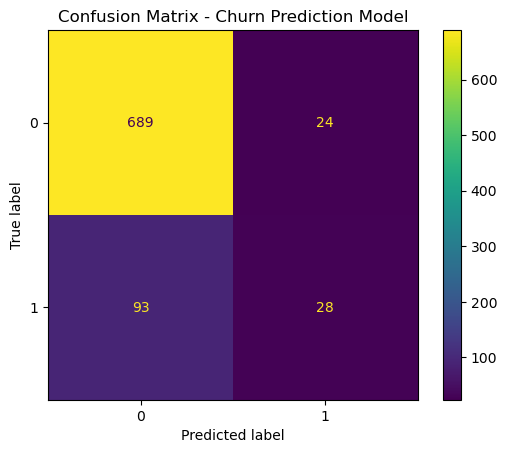

In [259]:
## Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Churn Prediction Model")
plt.show()

### Confusion Matrix Explanation
The confusion matrix helps us understand how well the model predicts customer churn.
- **True Positives (TP)**: Customers correctly identified as likely to churn.
- **True Negatives (TN)**: Customers correctly identified as likely to stay.
- **False Positives (FP)**: Customers predicted to churn but who actually stayed.
- **False Negatives (FN)**: Customers predicted to stay but who actually churned.
From a business perspective, **False Negatives are the most costly**, because these customers leave without intervention. The model minimizes False Negatives by achieving a high recall score for churners.
False Positives are less harmful, as they only result in offering retention incentives to customers who may not leave.


In [260]:
## Logistic Regression Coefficients
coefficients = pd.DataFrame({ 
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients



,Feature,Coefficient
17,customer service calls,0.719576
2,international plan,0.601579
4,number vmail messages,0.452635
5,total day minutes,0.328913
7,total day charge,0.328654
10,total eve charge,0.184930
8,total eve minutes,0.184731
16,total intl charge,0.133337
14,total intl minutes,0.123432
13,total night charge,0.078487


## Logistic Regression Coefficient Interpretation

Logistic regression coefficients help explain how each feature affects the likelihood of customer churn.
Features with **positive coefficients** increase the probability of churn, while **negative coefficients** reduce it.
Key observations:
- **High total day minutes and day charges** are associated with increased churn.
- **Frequent customer service calls** strongly increase churn likelihood, indicating customer dissatisfaction.
- **International plan usage** is linked to higher churn risk.
These results suggest that heavy daytime users and customers experiencing service issues are more likely to leave SyriaTel.


In [261]:
# Extract feature importance from the trained Random Forest model
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns 
).sort_values(ascending=False)# Visualize feature importance from the trained Random Forest model

# Display top 10 most important features
feature_importance.head(10)


customer service calls    0.171254
total day minutes         0.140113
total day charge          0.139800
international plan        0.099081
total eve charge          0.054479
total eve minutes         0.053977
total intl minutes        0.036765
total intl calls          0.035839
total intl charge         0.033162
number vmail messages     0.031577
dtype: float64

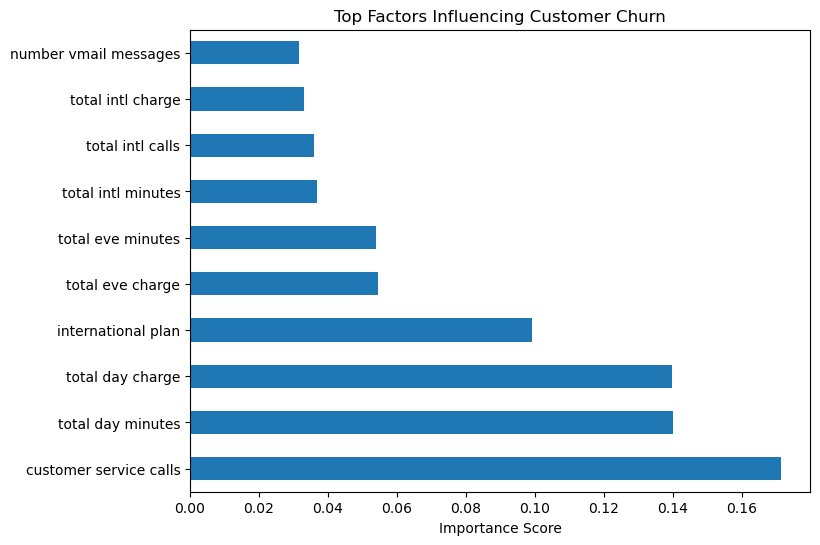

In [262]:
plt.figure(figsize=(8,6))
# Visualize feature importance
feature_importance.head(10).plot(kind='barh')
plt.title('Top Factors Influencing Customer Churn')
plt.xlabel('Importance Score')
plt.show()

## Random Forest Feature Importance

The Random Forest model highlights the most influential features in predicting churn.

Top contributing factors include:
- Customer service calls
- Total day minutes
- Total day charges
- International plan usage

This confirms the findings from logistic regression and strengthens confidence in the identified churn drivers.


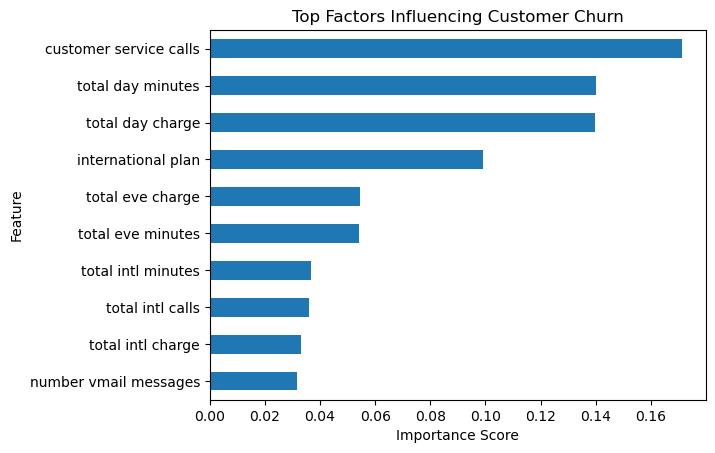

In [263]:
# Visualize feature importance
feature_importance.head(10).plot(kind='barh')
plt.title('Top Factors Influencing Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [264]:
 # Compare average day-time usage by churn status

df.groupby('churn')[['total day minutes', 'total day charge']].mean()

,total day minutes,total day charge
churn,,
False,175.175754,29.780421
True,206.914079,35.175921


###  Factors Driving Customer Churn

The final model identifies several features that strongly influence whether a customer is likely to churn.

The most important churn indicators include:
- **Customer service calls**
- **Total day minutes**
- **Total day charge**
- **International plan**
- **Total international minutes**

These features consistently appear as the strongest predictors in the model, indicating clear behavioral patterns among customers who leave SyriaTel.


### Why Are Customers Leaving SyriaTel?
Based on exploratory analysis and model results, customer churn at SyriaTel appears to be driven by the following key factors:

**1. High Customer Service Calls**
Customers who contact customer service frequently are more likely to churn. This suggests unresolved issues, dissatisfaction, or repeated service problems.

**2. High Day-Time Usage and Charges**
Customers with high daytime minutes and higher daytime charges show a higher likelihood of churn. These customers may feel the service is too expensive for their usage level.

**3. International Plan Usage**
Customers on international plans, especially those with high international call usage, are more likely to churn. This may indicate pricing dissatisfaction or availability of better international offers from competitors.

**4. Lack of Voice Mail Engagement**
Customers without active voicemail usage tend to churn more, possibly reflecting lower engagement with the service overall.

In summary, churn is strongly linked to **pricing concerns, service quality issues, and customer dissatisfaction**, rather than random behavior.


## Key Findings 
- Customers with many service calls are more likely to churn

- International plan users churn at higher rates

- High day-time usage and charges are strong churn indicators

### Recommendations for Reducing Churn
Based on the model’s findings, SyriaTel should consider the following actions:
1. **Proactively support customers with multiple service calls**
   - Escalate unresolved issues
   - Assign dedicated support to high-risk customers
2. **Introduce better pricing for high day-time users**
   - Offer discounted bundles for heavy daytime usage
   - Provide personalized usage plans
3. **Review international plan pricing**
   - Offer competitive international call packages
   - Monitor high international users for churn risk
4. **Use the model as an early warning system**
   - Retrain the model periodically with new data
   - Integrate predictions into customer retention workflows
These steps can help SyriaTel reduce churn, protect revenue, and improve customer satisfaction.
